In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Sales prediction of milk production commpany using LSTM Prepared BY CHULINDRA Rai From JAIN University**

In [12]:
df = pd.read_csv('production.csv',index_col='Date',parse_dates=True)
df.index.freq='MS'
     

In [14]:
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [16]:
df.describe()

,Production
count,168.000000
mean,754.708333
std,102.204524
min,553.000000
25%,677.750000
50%,761.000000
75%,824.500000
max,969.000000


Text(0.5, 1.0, 'Sales production')

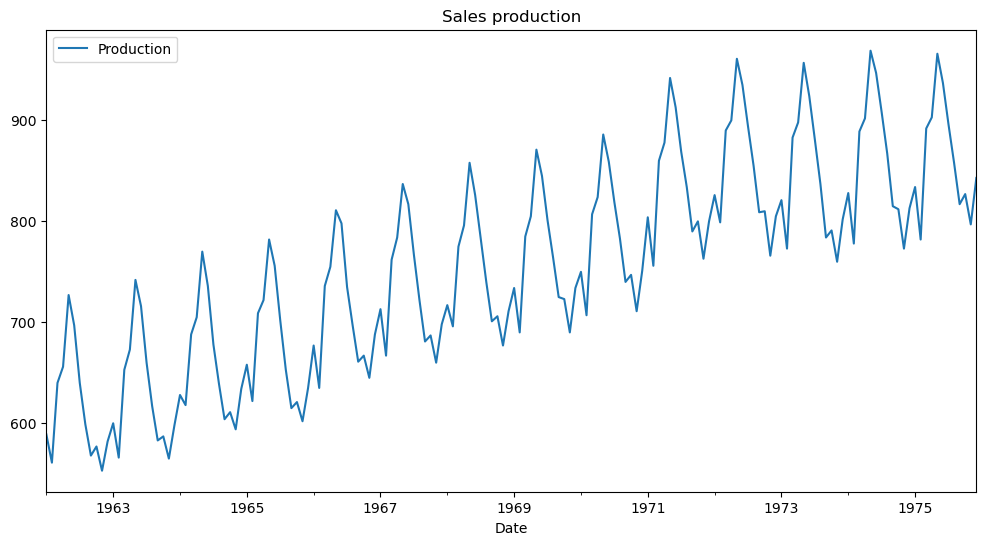

In [206]:
df.plot(figsize=(12,6))
plt.title("Sales production")

     

In [208]:
from statsmodels.tsa.seasonal import seasonal_decompose

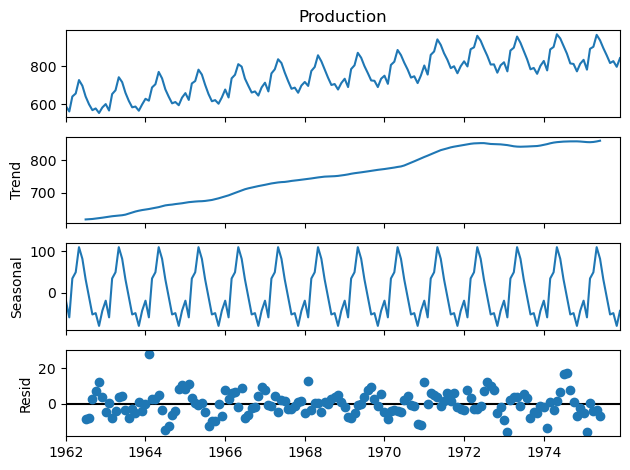

In [210]:
results = seasonal_decompose(df['Production'])
results.plot();
     

In [211]:
len(df)


168

In [214]:
train = df.iloc[:156]
test = df.iloc[156:]

In [216]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [218]:
df.head(),df.tail()

(            Production
 Date                  
 1962-01-01         589
 1962-02-01         561
 1962-03-01         640
 1962-04-01         656
 1962-05-01         727,
             Production
 Date                  
 1975-08-01         858
 1975-09-01         817
 1975-10-01         827
 1975-11-01         797
 1975-12-01         843)

In [220]:
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [222]:
scaled_train[:10]

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231]])

In [224]:
pip install keras


Note: you may need to restart the kernel to use updated packages.


In [225]:
!pip install tensorflow


In [227]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator


In [228]:
# define generator
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)
     

In [229]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.08653846 0.01923077 0.20913462]
Predict this y: 
 [[0.24759615]]


In [230]:
X.shape

(1, 3, 1)

In [231]:
# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input

In [71]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="keras")

In [73]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))


In [77]:
model.compile(optimizer='adam', loss='mse')

In [79]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100)                 │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [81]:
# fit model
model.fit(generator,epochs=50)

Epoch 1/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1011
Epoch 2/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0246
Epoch 3/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0189
Epoch 4/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0123
Epoch 5/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0113
Epoch 6/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0116
Epoch 7/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0068
Epoch 8/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0058
Epoch 9/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0044
Epoch 10/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0074
Epoch 11/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0051
Epoch 12/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0062
Epoch 13/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0030
Epoch 14/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0050
Epoch 15/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - lo

In [171]:

print(model.history.history)




{}


In [173]:
last_train_batch = scaled_train[-12:]

In [175]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [149]:
model.predict(last_train_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


array([[0.62122077]], dtype=float32)

In [151]:
scaled_test[0]

array([0.67548077])

In [153]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
      # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [154]:
test_predictions

[array([0.62122077], dtype=float32),
 array([0.6369946], dtype=float32),
 array([0.77645075], dtype=float32),
 array([0.86267257], dtype=float32),
 array([0.9598712], dtype=float32),
 array([0.9428629], dtype=float32),
 array([0.8729721], dtype=float32),
 array([0.7703898], dtype=float32),
 array([0.6682245], dtype=float32),
 array([0.61386234], dtype=float32),
 array([0.56952345], dtype=float32),
 array([0.5985335], dtype=float32)]

In [155]:
test.head()

,Production,Predictions
Date,,
1975-01-01,834,811.427839
1975-02-01,782,817.989754
1975-03-01,892,876.003513
1975-04-01,903,911.871788
1975-05-01,966,952.306408


In [258]:
# Assuming 'test_predictions' is a list/array of scaled predictions
true_predictions = scaler.inverse_transform(test_predictions)

# Add predictions to 'test' DataFrame without triggering the warning
test.loc[:, 'Predictions'] = true_predictions





Text(0.5, 1.0, 'Result')

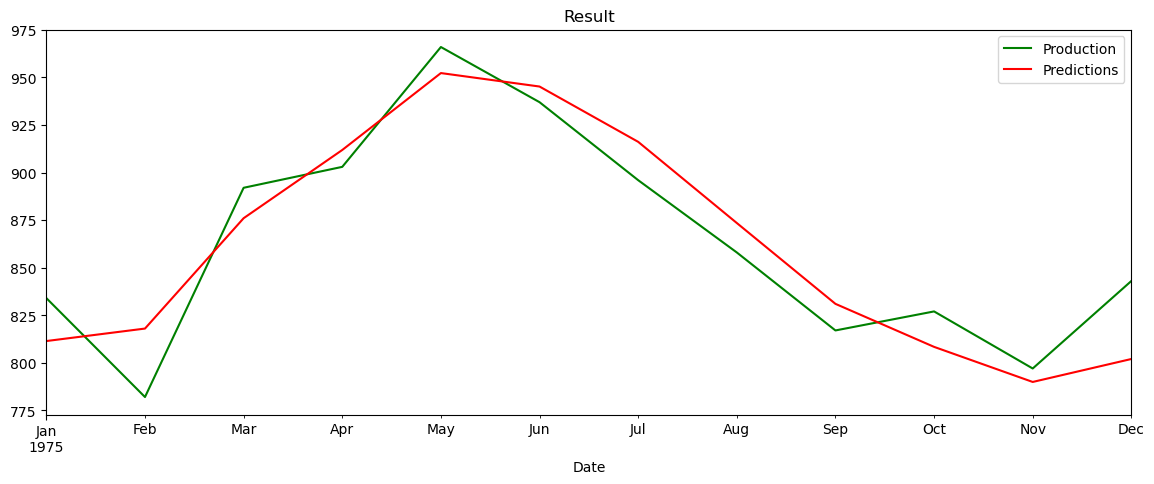

In [260]:
test.plot(figsize=(14, 5), color=['green', 'red'] )
plt.title("Result")


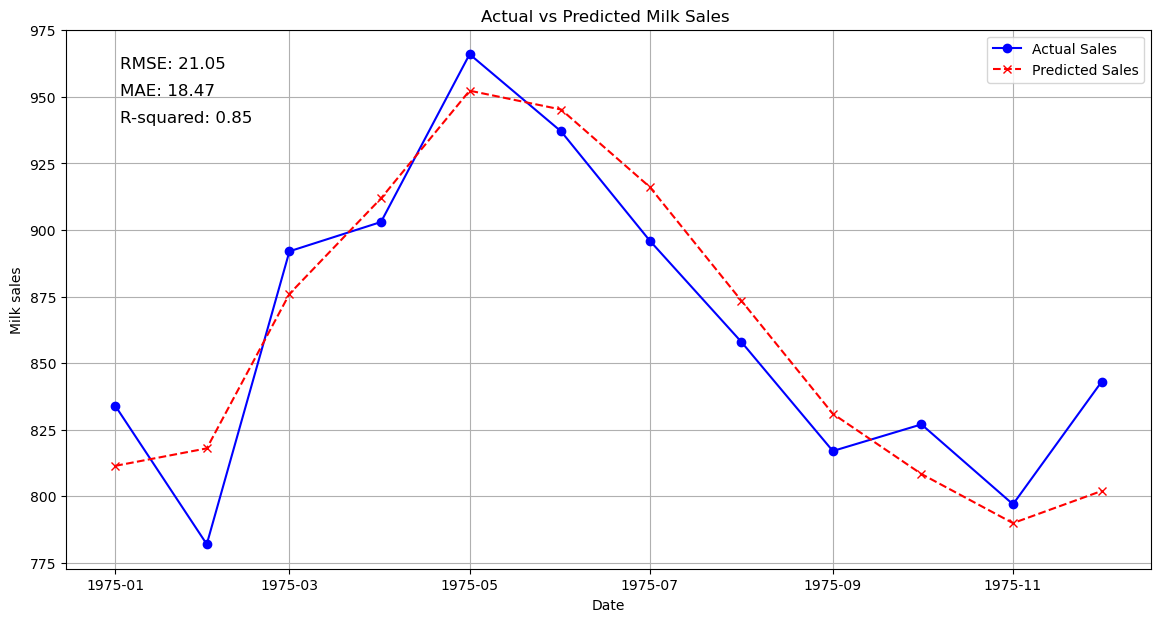

RMSE: 21.045993259504588
Mean Absolute Error (MAE): 18.474688688914
R-squared: 0.8490369988255917


In [270]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

# Calculate RMSE, MAE, and R-squared
rmse = sqrt(mean_squared_error(test['Production'], test['Predictions']))
mae = mean_absolute_error(test['Production'], test['Predictions'])
r_squared = r2_score(test['Production'], test['Predictions'])

# Plotting the Actual vs Predicted values
plt.figure(figsize=(14, 7))

# Plot actual production
plt.plot(test.index, test['Production'], label='Actual Sales', color='blue', linestyle='-', marker='o')

# Plot predicted production
plt.plot(test.index, test['Predictions'], label='Predicted Sales', color='red', linestyle='--', marker='x')

# Adding title and labels
plt.title('Actual vs Predicted Milk Sales ')
plt.xlabel('Date')
plt.ylabel('Milk sales')

# Display RMSE, MAE, and R-squared on the plot
plt.text(0.05, 0.95, f'RMSE: {rmse:.2f}', ha='left', va='top', transform=plt.gca().transAxes, fontsize=12, color='black')
plt.text(0.05, 0.90, f'MAE: {mae:.2f}', ha='left', va='top', transform=plt.gca().transAxes, fontsize=12, color='black')
plt.text(0.05, 0.85, f'R-squared: {r_squared:.2f}', ha='left', va='top', transform=plt.gca().transAxes, fontsize=12, color='black')

# Show legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()
print(f"RMSE: {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r_squared}")



*For sales prediction, I collect and preprocess the historical sales data of Sujal Dairy Pvt. Ltd., incorporating key variables such as seasonality, promotions, and economic indicators. These factors are crucial for understanding trends and patterns in the sales data. Next, I implement regression algorithms, including linear regression, decision trees, or more advanced models like LSTM networks, depending on the complexity and structure of the data.

Once the models are trained on the historical data, I validate their accuracy by evaluating performance using key metrics like RMSE (Root Mean Squared Error), MAE (Mean Absolute Error), and R-squared. These metrics provide insight into how well the model predicts future sales.

To further enhance accuracy, I optimize the hyperparameters of the models, fine-tuning them to achieve the best performance. After training and optimizing the models, I provide actionable insights that can guide business strategies, such as inventory management, promotional planning, and pricing strategie*

**Prepared BY CHULINDRA Rai From JAIN University**
